In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

## 1. Introduce the Data

### Import the dataset

`dataset.txt` is a tab delimited file that has around 5 lac rows and 24 features. We read the data into an object called df and then assign the labels of the features to their respective columns in the dataframe `df`.

In [2]:
df = pd.read_csv('dataset.txt', sep = "\t", header = None) #use nrows attribute for limited dataset
column_list = [
    'duration',
    'service',
    'source_bytes',
    'destination_bytes',
    'count',
    'same_srv_rate',
    'serror_rate',
    'srv_serror_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_src_port_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'flag',
    'ids_detection',
    'malware_detection',
    'ashula_detection',
    'label',
    'source_ip_address',
    'source_port_number',
    'destination_ip_address',
    'destination_port_number',
    'start_time',
    'protocol'
]
df.columns = column_list

/home/chrx/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#reading the first 5 rows of the data

df.head()

,duration,service,source_bytes,destination_bytes,count,same_srv_rate,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,...,ids_detection,malware_detection,ashula_detection,label,source_ip_address,source_port_number,destination_ip_address,destination_port_number,start_time,protocol
0,0.000393,dns,43,100,9,1.0,0.0,0.0,60,99,...,0,0,0,-1,fd95:ec1e:6a61:df6b:7de2:27ad:6105:3709,46071,fd95:ec1e:6a61:435f:7de5:27b0:7d84:3c0d,53,00:00:00,udp
1,0.000400,dns,43,100,11,1.0,0.0,0.0,61,99,...,0,0,0,-1,fd95:ec1e:6a61:df6b:7de2:27ad:6105:3709,51986,fd95:ec1e:6a61:435f:7de5:27b0:7d84:3c0d,53,00:00:00,udp
2,0.000432,dns,61,77,14,1.0,0.0,0.0,60,99,...,0,0,0,-1,fd95:ec1e:6a61:df6b:7de2:27ad:6105:3709,48133,fd95:ec1e:6a61:435f:7de5:27b0:7d84:3c0d,53,00:00:00,udp
3,0.000442,dns,61,77,15,1.0,0.0,0.0,39,99,...,0,0,0,1,fd95:ec1e:6a61:b804:7dcb:276f:0751:0ff5,58986,fd95:ec1e:6a61:435f:7de5:27b0:7d84:3c0d,53,00:00:00,udp
4,0.000452,dns,61,112,16,1.0,0.0,0.0,39,99,...,0,0,0,1,fd95:ec1e:6a61:b804:7dcb:276f:0751:0ff5,35589,fd95:ec1e:6a61:435f:7de5:27b0:7d84:3c0d,53,00:00:00,udp


In [4]:
#shape of the data is the number of rows by the number of features
df.shape

(499999, 24)

### Remove the target variable from the dataset
the target variable will be `label`

 **Important -- **
 `label = 0 if no Intrusion 1 Otherwise`

although `malware detection`, `ids_detection`, and `ashula_detection` could also be taken as labels, we decided against it since they were only indicative of the detection of intrusion by a software and therefore may not be correctly labelled.

In [5]:
df['label'] = [0 if x == 1 else 1 for x in df['label']]

In [6]:
label_target = df.pop('label').values

#dropping these labels because they aren't really needed in training
df.pop('ids_detection').values
df.pop('malware_detection').values
df.pop('ashula_detection').values

df.shape

(499999, 20)

In [7]:
#creating a variable y that contains the target column `label` for the training set
y = label_target

### Checking String Based Features

Here we check the unique values of string based features and determine if they are necessary. If there are a lot of unique values then the feature is ignored since it might lead to overfitting of the model

In [8]:
#count the unique values in service feature(string based)
service_value_counts = df['service'].value_counts()
print("Number of unique values = ", service_value_counts.shape[0], "\n")
print(service_value_counts)

Number of unique values =  12 

dns         313014
other       114253
ssh          71349
sip            617
snmp           199
smtp           182
radius         157
rdp             94
http            89
smtp,ssl        33
dhcp            11
ssl              1
Name: service, dtype: int64


In [9]:
#count the unique values in protocol feature(string based)
protocol_value_counts = df['protocol'].value_counts()
print("Number of unique values = ", protocol_value_counts.shape[0], "\n")
print(protocol_value_counts)

Number of unique values =  3 

udp     320156
tcp     177207
icmp      2636
Name: protocol, dtype: int64


In [10]:
#count the unique values in flag feature(string based)
protocol_value_counts = df['flag'].value_counts()
print("Number of unique values = ", protocol_value_counts.shape[0], "\n")
print(protocol_value_counts)

Number of unique values =  12 

SF        378699
S0        101335
OTH         9414
REJ         5520
RSTO        2250
SHR         1522
RSTRH        659
RSTOS0       320
S1           152
RSTR         104
S2            13
SH            11
Name: flag, dtype: int64


### Unique values for each feature in the dataset

In [11]:
df.T.apply(lambda x: x.nunique(), axis=1)

duration                       94392
service                           12
source_bytes                     490
destination_bytes                371
count                            101
same_srv_rate                     54
serror_rate                       80
srv_serror_rate                  101
dst_host_count                   101
dst_host_srv_count               101
dst_host_same_src_port_rate       40
dst_host_serror_rate              98
dst_host_srv_serror_rate         101
flag                              12
source_ip_address              12815
source_port_number             60971
destination_ip_address           974
destination_port_number         3148
start_time                     74672
protocol                           3
dtype: int64

### Removing unnecessary features
Everything from source_ip_address to start_time is of no use because these things are really random...

In [12]:
df.pop('source_ip_address').values
df.pop('source_port_number').values
df.pop('destination_ip_address').values
df.pop('destination_port_number').values
df.pop('start_time').values
df.head()

,duration,service,source_bytes,destination_bytes,count,same_srv_rate,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,flag,protocol
0,0.000393,dns,43,100,9,1.0,0.0,0.0,60,99,0.0,0.0,0.0,SF,udp
1,0.000400,dns,43,100,11,1.0,0.0,0.0,61,99,0.0,0.0,0.0,SF,udp
2,0.000432,dns,61,77,14,1.0,0.0,0.0,60,99,0.0,0.0,0.0,SF,udp
3,0.000442,dns,61,77,15,1.0,0.0,0.0,39,99,0.0,0.0,0.0,SF,udp
4,0.000452,dns,61,112,16,1.0,0.0,0.0,39,99,0.0,0.0,0.0,SF,udp


### Features to use

In [13]:
list(df)

['duration',
 'service',
 'source_bytes',
 'destination_bytes',
 'count',
 'same_srv_rate',
 'serror_rate',
 'srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'flag',
 'protocol']

### What the data looks like now in terms of data type

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 15 columns):
duration                       499999 non-null float64
service                        499999 non-null object
source_bytes                   499999 non-null int64
destination_bytes              499999 non-null int64
count                          499999 non-null int64
same_srv_rate                  499999 non-null float64
serror_rate                    499999 non-null float64
srv_serror_rate                499999 non-null float64
dst_host_count                 499999 non-null int64
dst_host_srv_count             499999 non-null int64
dst_host_same_src_port_rate    499999 non-null float64
dst_host_serror_rate           499999 non-null float64
dst_host_srv_serror_rate       499999 non-null float64
flag                           499999 non-null object
protocol                       499999 non-null object
dtypes: float64(7), int64(5), object(3)
memory usage: 57.2+ MB


### Transfrom Catergorical Data to Numerical Data

From the above result it can be seen that `service`, `flag`, and `protocol` are not numeric data. Since we have to supply the machine learing models with numeric data we have to somehow transform the categorical data to numeric data.

For this purpose we use a Label Encoder that encodes the unique values of a feature to a unique numeric constant(number). We do this encoding for all the rows in the data.

In [15]:
from sklearn import preprocessing

In [16]:
#get the unique values for the following categorical data
categorical_data = ['service', 'flag', 'protocol']
unique_flag_data = df['flag'].unique()
unique_service_data = df['service'].unique()
unique_protocol_data = df['protocol'].unique()

#### Encoder for feature : Flag

This shows an example of how categorical data like flag may be encoded and then decoded from categorical to numeric and then from numeric to categorical respectively.

In [17]:
le_flag = preprocessing.LabelEncoder()
#Fit the label encoder to unique values
le_flag.fit(unique_flag_data)

#Fit the label data to some example data
example_flag_data = list(df.head()['flag'])
#Fit the label encoder and return encoded labels
encoded_flag_data = le_flag.transform(example_flag_data)

#Transform labels back to original encoding
decoded_flag_data = list(le_flag.inverse_transform(encoded_flag_data))

print(example_flag_data)
print(encoded_flag_data)
print(decoded_flag_data)
#Ignore any warnings

['SF', 'SF', 'SF', 'SF', 'SF']
[9 9 9 9 9]
['SF', 'SF', 'SF', 'SF', 'SF']


/home/chrx/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Encoder for feature : service and protocol

In [18]:
le_service = preprocessing.LabelEncoder()
le_service.fit(unique_service_data)

le_protocol = preprocessing.LabelEncoder()
le_protocol.fit(unique_protocol_data)

LabelEncoder()

#### Encode the categorical features for all rows in the data

In [19]:
df['flag'] = le_flag.transform(df['flag'])
df['service'] = le_service.transform(df['service'])
df['protocol'] = le_protocol.transform(df['protocol'])
df.head()

,duration,service,source_bytes,destination_bytes,count,same_srv_rate,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,flag,protocol
0,0.000393,1,43,100,9,1.0,0.0,0.0,60,99,0.0,0.0,0.0,9,2
1,0.000400,1,43,100,11,1.0,0.0,0.0,61,99,0.0,0.0,0.0,9,2
2,0.000432,1,61,77,14,1.0,0.0,0.0,60,99,0.0,0.0,0.0,9,2
3,0.000442,1,61,77,15,1.0,0.0,0.0,39,99,0.0,0.0,0.0,9,2
4,0.000452,1,61,112,16,1.0,0.0,0.0,39,99,0.0,0.0,0.0,9,2


### PCA

PCA stands for Principal Component Analysis. This algorithm is used for dimensionality reduction.
The algorithm is supplied with the number of dimension to output and then the PCA algorithm automatically calculates the new dimensions from the old dimensions. New dimensions are really a linear combination of the old dimensions.

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pd.DataFrame(pca.fit_transform(df))

In [21]:
X_pca.head()

,0,1
0,-241.430381,-83.353206
1,-241.431096,-83.369025
2,-264.278958,-65.191378
3,-264.274311,-65.113415
4,-229.275807,-65.414867


## Model Building

We have used 3 different types of machine learning models which are:

    -KMeans
    -Logistic Regression
    -Random Forests
    
Here KMeans is a Unsupervised Learning model and the other 2 are Supervised Learning Models.

### Kmeans

Here we use 2 clusters because we want the data to cluster into 2 clusters: Intrusion or Not Intrusion

[[     0 499995]
 [     1      4]]
[[     0 129616]
 [     1 370383]]


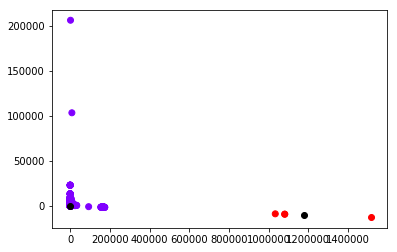

In [22]:
from sklearn.cluster import KMeans

#converting to numpy array : format needed by sklearn
X_pca_np = np.array(X_pca).astype(float)

#creating a model
kmeans = KMeans(n_clusters = 2, random_state = 0)

#fitting the data to the model
kmeans.fit(X_pca_np)

#plotting the points and the cluster centroids
plt.scatter(X_pca_np[:,0],X_pca_np[:,1], c = kmeans.labels_, cmap = 'rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

#frequency of labels
predicted = kmeans.predict(X_pca_np)
unique, counts = np.unique(predicted, return_counts=True)
print(np.asarray((unique, counts)).T)
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

accuracy Score :  0.25924051848103696
Confusion Matrix
 [[129616      0]
 [370379      4]]


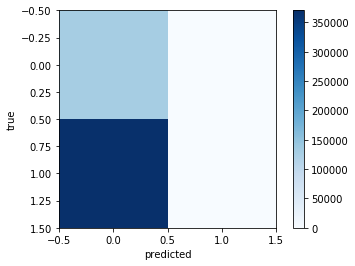

In [23]:
#calculating the percentage of correct clusterings
from sklearn.metrics import accuracy_score
print("accuracy Score : ",accuracy_score(y, kmeans.predict(X_pca_np)))

#printing confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix\n",confusion_matrix(y, kmeans.predict(X_pca_np)))

#plotting confusion matrix
plt.imshow(confusion_matrix(y, kmeans.predict(X_pca_np)),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

#### Lets try with a change in hyperparameters to kmeans

accuracy Score :  0.25924051848103696
Confusion Matrix
 [[129616      0]
 [370379      4]]


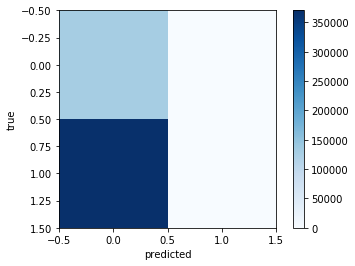

In [24]:
#fitting data to modded kmeans model
kmeans_modded = KMeans(n_clusters = 2, random_state = 0, max_iter = 100, algorithm = 'auto')
kmeans_modded.fit(X_pca_np)

#calculating the percentage of correct labels
print("accuracy Score : ",accuracy_score(y, kmeans_modded.predict(X_pca_np)))
#printing confusion matrix
print("Confusion Matrix\n",confusion_matrix(y, kmeans_modded.predict(X_pca_np)))

#plotting confusion matrix
plt.imshow(confusion_matrix(y, kmeans_modded.predict(X_pca_np)),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

#### Lets try to scale the data and then run kmeans

In [25]:
scaler = preprocessing.MinMaxScaler()

#scaling the data
X_pca_np_scaled = scaler.fit_transform(X_pca_np)

#fitting the data to modded kmeans
kmeans_modded.fit(X_pca_np_scaled)

#caclulating the percentage of correct labels
print("accuracy Score : ",accuracy_score(y, kmeans_modded.predict(X_pca_np_scaled)))
#printing confusion matrix
print("Confusion Matrix\n",confusion_matrix(y, kmeans_modded.predict(X_pca_np_scaled)))





accuracy Score :  0.25924051848103696
Confusion Matrix
 [[129616      0]
 [370379      4]]


### Regression

#### Splitting the dataset
We split the data into Training and Test set based on the parameter train_size.

Example : if train_size = 0.70 then Training Set contains 80% of the data and Testing Set other 20%

In [26]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.70, random_state=1)

/home/chrx/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test, func):
    model = func()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [28]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train, y_train, X_test, y_test, LogisticRegression)
print(auc_processed)

0.9274834718737871


This shows that Regression can correctly predict 98.5% of data

### Random Forests

In [29]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100, random_state=0)

In [30]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

accuracy Score :  0.9901333333333333
Confusion Matrix
 [[ 38059    874]
 [   606 110461]]


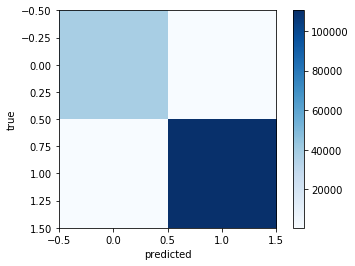

In [31]:
#caclulating the percentage of correct labels
print("accuracy Score : ",accuracy_score(y_test, randomForest.predict(X_test)))
#printing confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, randomForest.predict(X_test)))

#plotting confusion matrix
plt.imshow(confusion_matrix(y_test, randomForest.predict(X_test)),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### Conclusion

Random Forests is the best available predictor for intrusion detection with Accuracy Score of 99.01%